In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as scs
plt.style.use('seaborn')
%matplotlib inline



In [74]:
file_path = 'C:/Users/dcste/OneDrive/Option Theory/CSUSHPINSA.xls'

In [2]:
api = 'caf2a437b55be8f56406870c1bed3521'
fred = Fred(api_key= api)
data = fred.get_series('CSUSHPINSA').dropna()

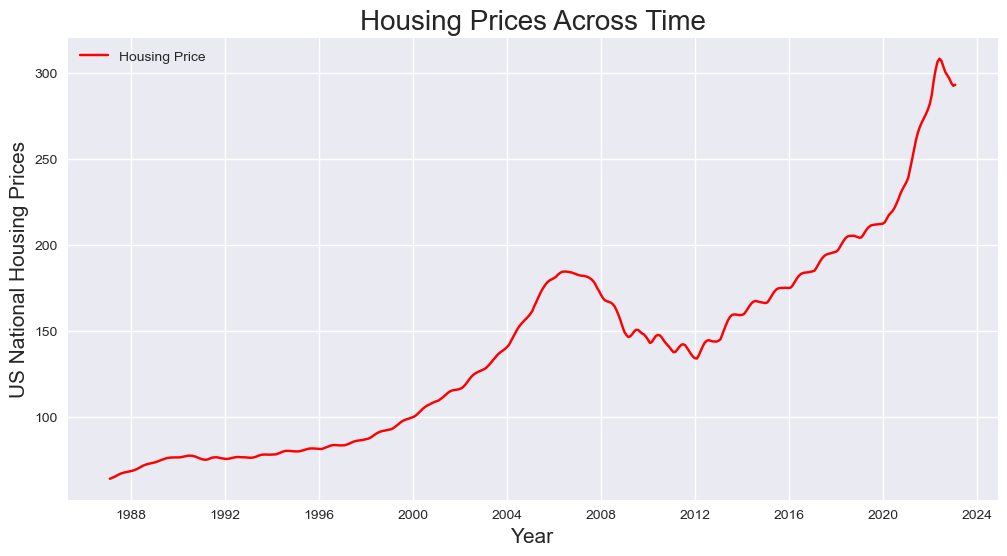

In [3]:
data = pd.DataFrame(data, columns = ['Prices'])
data['Monthly_Change'] = np.log(data['Prices']/data['Prices'].shift(1))
data = data.dropna()
plt.figure(figsize = (12,6))
plt.plot(data['Prices'], label = 'Housing Price', color = 'red')
plt.ylabel('US National Housing Prices', size = 15)
plt.xlabel('Year', size = 15)
plt.title('Housing Prices Across Time', size = 20)
plt.legend(loc = 'upper left')

- As you can see housing prices have sky rocketed since the pandemic began - faster than the rate of the global financial crisis in 2008. This is because interest rates were extremly low since then and people moved out of cities and bought up tons of property. 
- We definitley will not have a housing crisis like in 2008, but I do believe there is going to be correction soon in the housing market- **it is already happening.** 
- The average yearly price appreciation since 1988 (which I calculate below) is $4.34$%

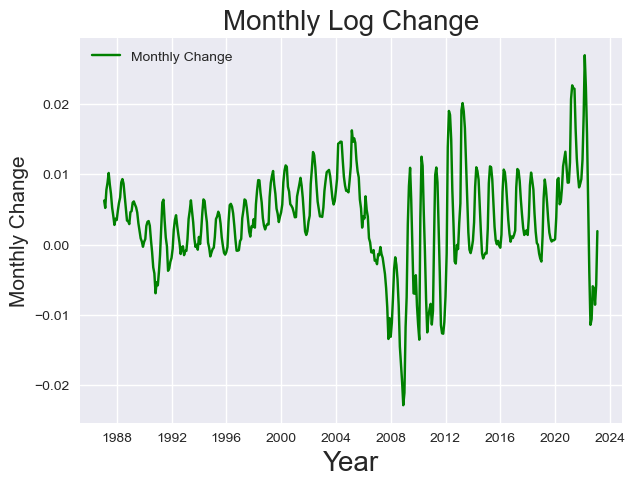

In [4]:
plt.figure(figsize=(7,5))
plt.plot(data['Monthly_Change'], color = 'green', label = 'Monthly Change')
plt.title('Monthly Log Change', size = 20)
plt.ylabel('Monthly Change', size = 15)
plt.xlabel('Year', size = 20)
plt.legend(loc = 'upper left')

In [5]:
print('Since 1989, the annual change of housing prices is',np.round(data['Monthly_Change'].mean()*12,8))

Since 1989, the annual change of housing prices is 0.04229195


In [6]:
print('The yearly standard deviation of housing prices in America is',np.round(data['Monthly_Change'].std()*np.sqrt(12),8))

The yearly standard deviation of housing prices in America is 0.02408105


In [7]:
scaled_logmean = (data['Monthly_Change'].mean()*12)*21
400*(1+scaled_logmean)

755.2523670168935

- The expected value of your home in 20 years is $\mathbb{E}(P_{20}) = 340*(1.0438)*20 = 635,000$
- This is based on continuoulsy compouned returns so I do not need to raise the number to the twentieth power. 

- This is based on historical national home price data, so this is an extremly rough estimate. 

In [8]:
def confidence_interval(sigma = 1, mean = 1, time_factor = 1, initial_housing_price = 1):
    df = pd.DataFrame(index = ['Lower Limit', 'Expected Value','Upper Limit'], columns = ['95% Confidence Interval of House Price','Gross Return'] )
    scaled_vol = sigma*np.sqrt(time_factor)
    scaled_mean = np.round(mean*time_factor,5)
    lower_ci = np.round(scaled_mean - 1.96*(scaled_vol), 5)
    higher_ci = np.round(scaled_mean+ 1.96*(scaled_vol),5)
    df.loc['Lower Limit',:] = (1+lower_ci)*initial_housing_price
    df.loc['Expected Value',:] = initial_housing_price*(1+scaled_mean)
    df.loc['Upper Limit',:] = (1+higher_ci)*initial_housing_price
    df.loc['Lower Limit','Gross Return'] = (lower_ci*100).astype(str) + '%'
    df.loc['Expected Value','Gross Return'] = (np.round(1+scaled_mean*100,5)).astype(str) + '%'
    df.loc['Upper Limit', 'Gross Return'] = (np.round(higher_ci*100,5)).astype(str) + '%'
    return  df

    
    


In [9]:
confidence_interval(sigma = .02397377, mean = .04347019, time_factor=21, initial_housing_price=600)

,95% Confidence Interval of House Price,Gross Return
Lower Limit,1018.524,69.754%
Expected Value,1147.722,92.287%
Upper Limit,1276.92,112.82%


This would be a very rough estimate based on historical price appreciation using the Case-Shiller Housing Index. 
- In twenty years, we can see that there is a 95% chance your home will be within that range, but other factors could also drive up the value of your home in Longmont (e.g., school zones, population change, job market). I would say that Colorado is a safe investment because of how fast it is growing relative to other states. 
- You certainly will not lose any money on your home because houses are always a great investment, *but trying to determine your housing price 20 years from now is definitely challenging, so hopefully you can get a better perspective on what I calculated using historical data, but always remember what has happened historically does not imply it will continue in the future.*

# Housing Market Influence On the Markets

- I am going to calculate the historical correlation between the market, home depot, and the housing market 

In [10]:
tickers = 'HD ^GSPC'
df = pd.DataFrame(yf.download(tickers, start = '1987-01-01', interval = '1mo')['Adj Close'])
df = df.pct_change().dropna()
df = df.join(data['Monthly_Change'], how = 'inner')
df.columns = ['Home Depot', 'SPY Index', 'Housing Market']

[*********************100%***********************]  2 of 2 completed


<AxesSubplot:title={'center':'1 Year Rolling Correlation with Housing Market'}>

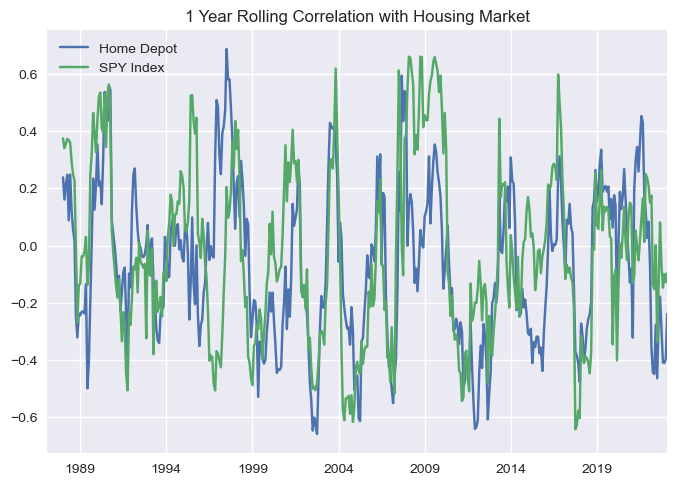

In [11]:
(df[['Home Depot','SPY Index']].rolling(12).corr(df['Housing Market'])).plot(title='1 Year Rolling Correlation with Housing Market')

In [12]:
(df[['Home Depot','SPY Index']].rolling(6).corr(df['Housing Market'])).describe()

,Home Depot,SPY Index
count,428.000000,428.000000
mean,-0.059299,-0.008984
std,0.424716,0.435669
min,-0.882176,-0.989771
25%,-0.364441,-0.330560
50%,-0.068718,-0.006931
75%,0.234076,0.308473
max,0.953000,0.961468


In [13]:
(df[['Home Depot','SPY Index']].rolling(12).corr(df['Housing Market'])).describe()

,Home Depot,SPY Index
count,422.000000,422.000000
mean,-0.064112,-0.020928
std,0.273910,0.305737
min,-0.658427,-0.642305
25%,-0.273348,-0.238441
50%,-0.064452,-0.051918
75%,0.139627,0.204206
max,0.686612,0.660037


In [87]:
(df[['Home Depot','SPY Index']].rolling(60).corr(df['Housing Market'])).describe()

,Home Depot,SPY Index
count,369.000000,369.000000
mean,-0.048368,0.017571
std,0.124392,0.162802
min,-0.365575,-0.246833
25%,-0.124913,-0.099785
50%,-0.050259,-0.015576
75%,0.041331,0.075214
max,0.234016,0.480174


Above is the rolling 1 year correlation. As you can see these correlations are pretty noisy a.k.a. *stationary*. In fact the mean rolling correlation for a year is essentially 0. The same can be said for the 5 Year Correlation. The standard deviatsions would also suggest that the correlations are always around 0  even though we do see a slight negative skewness in the data. 



<AxesSubplot:title={'center':'Growth of 10 Dollars Invested Right Before Financial Crisis'}>

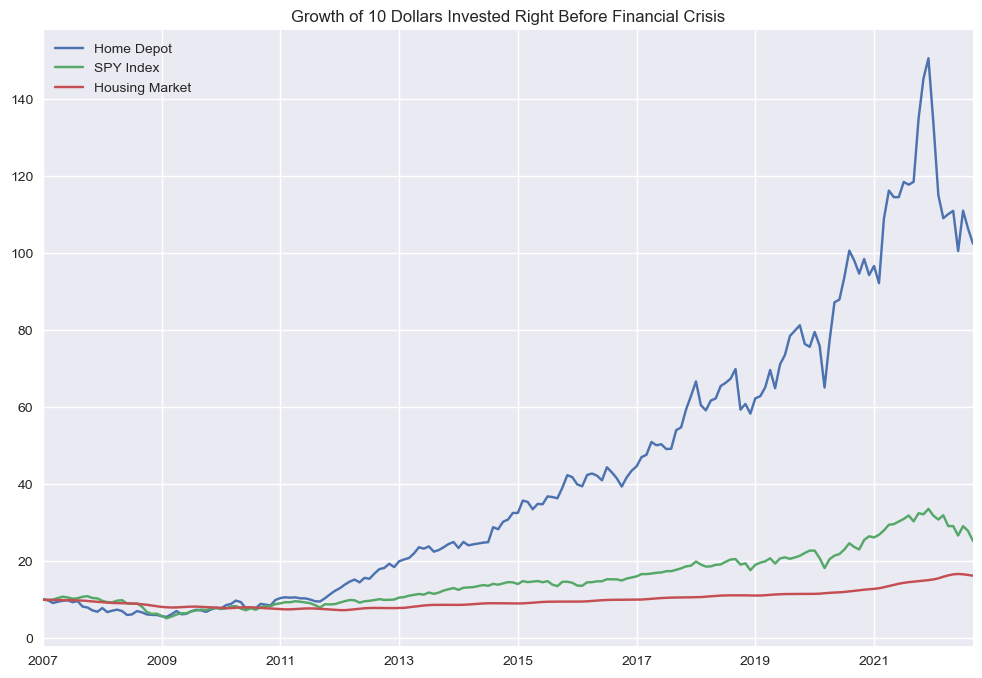

In [129]:
(10*(1+df.loc['2007':,]).cumprod()).plot(title = "Growth of 10 Dollars Invested Right Before Financial Crisis", figsize = (12,8))

In [110]:
df_prices = pd.DataFrame(yf.download(tickers, start = '2005-01-01', interval= '1mo')['Adj Close'])

[*********************100%***********************]  2 of 2 completed


In [111]:
df_prices = df_prices.join(data['Prices'], how = 'inner')


In [112]:
df_prices.columns = ['Home Depot', "SPY Index",'Housing Market Index']

<AxesSubplot:>

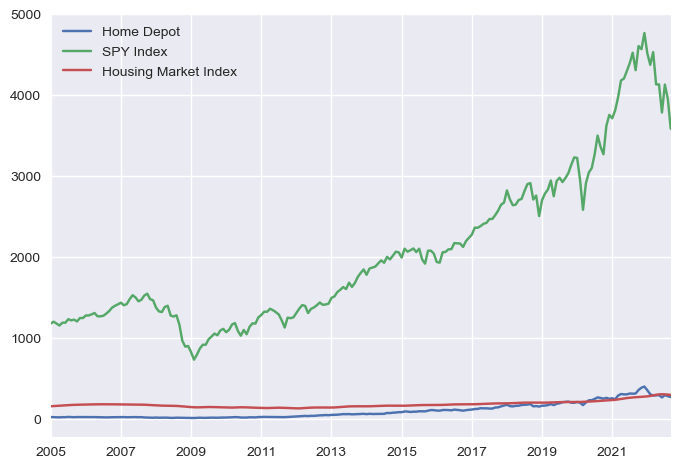

In [113]:
df_prices.plot()

In [115]:
df_prices

,Home Depot,SPY Index,Housing Market Index
2005-01-01,26.733576,1181.270020,160.130
2005-02-01,25.930130,1203.599976,161.924
2005-03-01,24.776823,1180.589966,164.576
2005-04-01,22.974882,1156.849976,166.999
2005-05-01,25.560118,1191.500000,169.543
...,...,...,...
2022-05-01,297.102356,4132.149902,306.605
2022-06-01,269.153595,3785.379883,308.422
2022-07-01,297.191254,4130.290039,307.001
2022-08-01,284.827209,3955.000000,303.472
